# Exploring Network Architectures

In this section you will:

* Explore the impact of different neural network architectures on performance including:
  * Accuracy,
  * Training time,
  * And loss
* Build an intuition for how layers can build up or destroy useful information

## What is Network Architecture

In short, a neural network architecture's is defined the number and shape of it's layers. In state-of-the-art neural networks these architectures can get quite complex, with some layers skipping other layers, or some layers passing data backwards to previous layers. This lab is focused on relatively simple architectures for fully connected neural networks. 

Once again, we'll be working with the MNIST dataset.

In [20]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

## Purpose of Layers

Each layer is an opportunity to add *or reduce* complexity. In some cases, enormous complexity is required to accurately model a problem. In other cases, simpler architectures may perform better.

One appropriate analogy is that a neural network is like an assembly line–each layer adds a piece of the final product, and as our data nears the end, a complete picture emerges.

Another appropriate analogy is that a neural netork is like the game of telephone—every time we say the phrase we just heard into the ear of our neighbor, some of the information is lost. By the end, the phrase has changed completely. 

Paradoxically, these are both true. Sometime we want to ignore parts of the input, because they may be irrelevant. Othertimes, we need to build up complex interactions between different pieces of the input. 

One truism though, is that more complex models always require more training.

## Even Simple Architectures Can Work

Even this simple model will significantly outperform random guessing, and it's fast and easy to train.

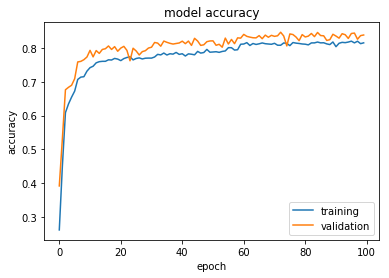

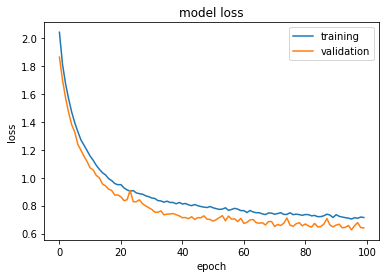

In [6]:
model = Sequential()
model.add(Dense(units=5, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history)

But overly simplistic models will always fail. Frankly, it is remarkable that this next network performs as well as it does (nearly twice as good as guessing randomly!) but no amount of training will make this network architecture an accurate classifier.

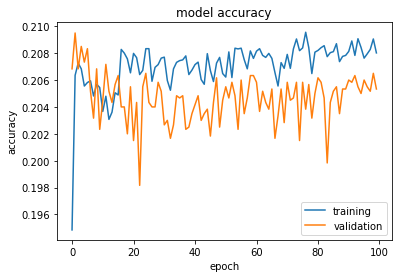

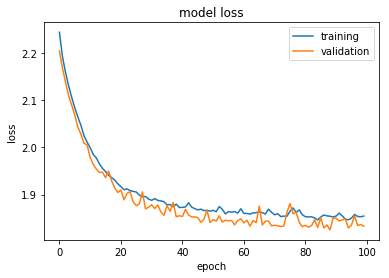

In [7]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history)

Increasing the number of parameters can often yield better results, in this case we have to train for fewer epochs to achieve a higher accuracy. 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 25us/step - loss: 0.8765 - acc: 0.7762 - val_loss: 0.4509 - val_acc: 0.8970
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.4417 - acc: 0.8895 - val_loss: 0.3323 - val_acc: 0.9182
Epoch 3/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3584 - acc: 0.9068 - val_loss: 0.2839 - val_acc: 0.9265
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3138 - acc: 0.9165 - val_loss: 0.2572 - val_acc: 0.9308
Epoch 5/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2833 - acc: 0.9233 - val_loss: 0.2351 - val_acc: 0.9407
Epoch 6/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.2614 - acc: 0.9299 - val_loss: 0.2199 - val_acc: 0.9443
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2430 - acc: 0.9347 - val_loss: 0.2064 - val_acc:

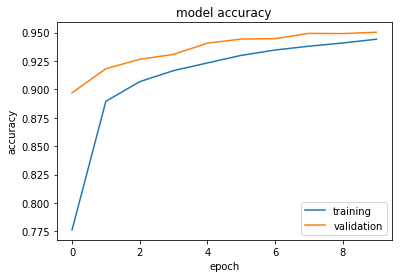

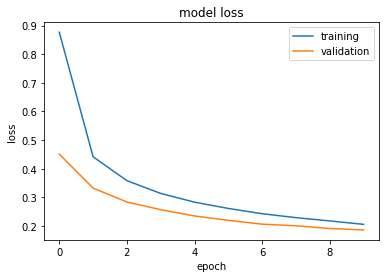

In [11]:
model = Sequential()
model.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history)

But we can go overboard here as well, both by making the network too slow to train and by overfitting. 

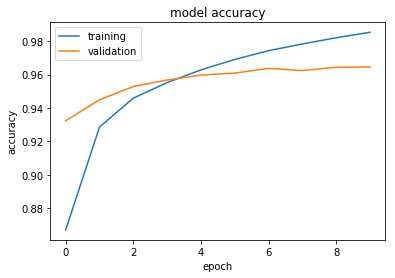

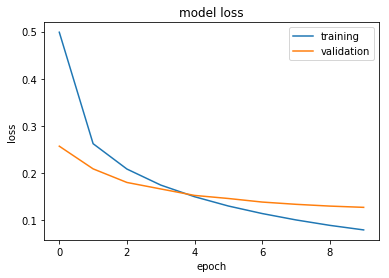

10000/10000 [==============================] - 1s 78us/step
Test loss: 0.149
Test accuracy: 0.956


In [16]:
model = Sequential()
model.add(Dense(units=2048, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Notice how after awhile we see that our performance on training data is better than on validation data. This is a sign that we might have overfit our data—and indeed the model tops out at over 98% on the training data, but drops down to 95% on the test data. This model with a 2048-node layer doesn't really perform better than the previous one which had only 256 nodes in its hidden layer. Lets see what happens when we really get extreme:

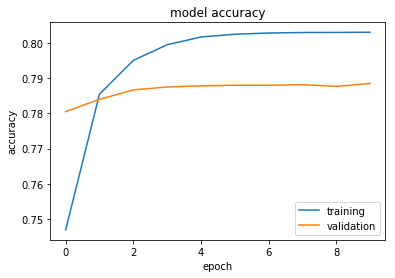

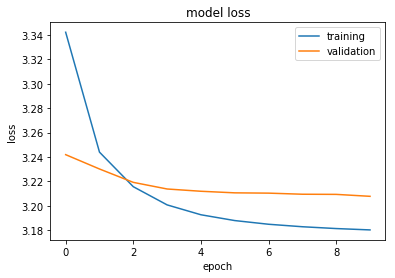

10000/10000 [==============================] - 3s 324us/step
Test loss: 3.26
Test accuracy: 0.782


In [19]:
model = Sequential()
model.add(Dense(units=10000, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

This network took **much** longer to train. It appears to be overfit as early as the second training epoch, and indeed when we run the test data it's worse than the training performance. Not only that, but it actually performs significantly **WORSE** than the simpler networks above. Five nodes performed about as well ten thousand nodes, but 256 nodes performed better than either of these. 

## Multiple Layers

Making each layer wider is one way to add complexity, but not the only way. Consider these two architectures: 

In [24]:
# 10,000 total nodes in hidden layers
wide_model = Sequential()
wide_model.add(Dense(units=10000, activation='sigmoid', input_shape=(image_size,)))
wide_model.add(Dense(units=num_classes, activation='softmax'))
wide_model.summary()

# 9000 total nodes in hidden layers
long_model = Sequential()
long_model.add(Dense(units=3000, activation='sigmoid', input_shape=(image_size,)))
long_model.add(Dense(units=3000, activation='sigmoid'))
long_model.add(Dense(units=3000, activation='sigmoid'))
long_model.add(Dense(units=num_classes, activation='softmax'))
long_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 10000)             7850000   
_________________________________________________________________
dense_48 (Dense)             (None, 10)                100010    
Total params: 7,950,010
Trainable params: 7,950,010
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 3000)              2355000   
_________________________________________________________________
dense_50 (Dense)             (None, 3000)              9003000   
_________________________________________________________________
dense_51 (Dense)             (None, 3000)              9003000   
_________________________________________________________________


**Why does the second model have nearly 3 times as many parameters, even though it's got 1000 fewer nodes?**

We've seen the `wide_model`'s performance above...   
**How well do you think the long model will perform?**  
**What about training time, will it train faster or slower?**  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 83s 2ms/step - loss: 0.3760 - acc: 0.9011 - val_loss: 0.3054 - val_acc: 0.9242
Epoch 2/5
54000/54000 [==============================] - 82s 2ms/step - loss: 0.3354 - acc: 0.9099 - val_loss: 0.2763 - val_acc: 0.9277
Epoch 3/5
54000/54000 [==============================] - 84s 2ms/step - loss: 0.3052 - acc: 0.9160 - val_loss: 0.2595 - val_acc: 0.9300
Epoch 4/5
54000/54000 [==============================] - 83s 2ms/step - loss: 0.2818 - acc: 0.9219 - val_loss: 0.2427 - val_acc: 0.9338
Epoch 5/5
54000/54000 [==============================] - 83s 2ms/step - loss: 0.2622 - acc: 0.9265 - val_loss: 0.2332 - val_acc: 0.9353


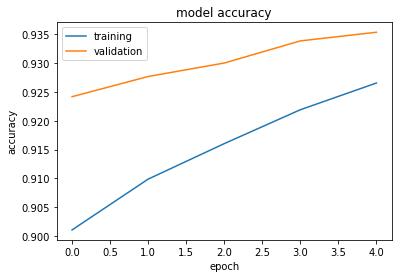

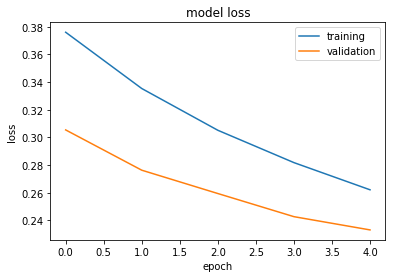

Test loss: 0.272
Test accuracy: 0.922


In [27]:
long_model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = long_model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=False, validation_split=.1)
plot_training_history(history, long_model)

Well, it takes FOREVER to train just 5 epochs, but unlike the 10k node model, it seems to continue improving rather than plateu right away. It also doesn't appear to have overfit the data. Interestingly, it's still underperforming compared to some of the simpler models, it's possible this could change if we train for long enough—but other models are doing more with significantly fewer resources... it's worth thinking about why that might be. 

## Thinking About Resolution

In the case of the MNIST digits dataset, the initial input is only 28 by 28 pixels, a total of 784 data points. In the previous `wide_model` and `long_model` we 'increased' the resolution of the each datapoint to 10,000 and 3000 values per layer respectively. 

The strength of neural networks is capturing complex interactions between data points, but scaling 784 values into 10,000 or 3000 nodes makes training the network harder and makes the problem of the second layer **more** complex than the original problem. Obviously, we were still able to achieve decent performance this way, but consider this:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_79 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_80 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_81 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


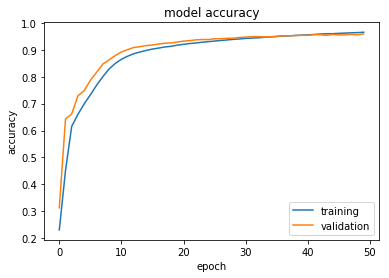

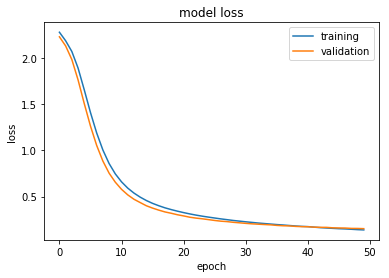

Test loss: 0.187
Test accuracy: 0.946


In [34]:
long_model_two = Sequential()
long_model_two.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
long_model_two.add(Dense(units=128, activation='sigmoid'))
long_model_two.add(Dense(units=64, activation='sigmoid'))
long_model_two.add(Dense(units=num_classes, activation='softmax'))
long_model_two.summary()

long_model_two.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = long_model_two.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, long_model_two)

By reducing the size of the problem at each layer, we make each epoch much faster. In this case, we've also improved accuracy. As in many things, overcomplication is a big problem. On MNIST, its possible to 